In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_object as go
import plotly.express as px

ModuleNotFoundError: No module named 'plotly.graph_object'

In [57]:
data=pd.read_csv('Capacite_Infraprojects_Historical_Data--sambitnew.csv')

In [3]:
!pip install pandas

In [4]:
!pip install numpy

In [6]:
!pip install matplotlib

In [52]:
Data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-09-2017 00:00,339.7424622,342.5499878,399,335,399,18583678
3,26-09-2017 00:00,335.1305847,337.8999939,352.8500061,328.6499939,345.5,3365236
4,27-09-2017 00:00,343.7096558,346.5499878,371,338.0499878,340.25,6497799


In [55]:
Data["Date"] = pd.to_datetime(Data["Date"], errors='coerce')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3424\397779568.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data["Date"] = pd.to_datetime(Data["Date"], errors='coerce')


In [60]:
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-09-2017 00:00,339.7424622,342.5499878,399,335,399,18583678
3,26-09-2017 00:00,335.1305847,337.8999939,352.8500061,328.6499939,345.5,3365236
4,27-09-2017 00:00,343.7096558,346.5499878,371,338.0499878,340.25,6497799


In [62]:
data.columns = data.columns.str.strip()  # This removes any leading/trailing spaces in column names
# Alternatively, rename if the column has a different name, e.g., "date" instead of "Date"
data = data.rename(columns={'YourDateColumnName': 'Date'}) 

In [63]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3424\3064529874.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [64]:
data["day"]=data["Date"].dt.day
data["month"]=data["Date"].dt.month
data["year"]=data["Date"].dt.year
data["day_of_week"]=data["Date"].dt.dayofweek

data.head()

,Date,Adj Close,Close,High,Low,Open,Volume,day,month,year,day_of_week
0,NaT,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,CAPACITE.NS,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09-25,339.7424622,342.5499878,399,335,399,18583678,25.0,9.0,2017.0,0.0
3,2017-09-26,335.1305847,337.8999939,352.8500061,328.6499939,345.5,3365236,26.0,9.0,2017.0,1.0
4,2017-09-27,343.7096558,346.5499878,371,338.0499878,340.25,6497799,27.0,9.0,2017.0,2.0


In [70]:
# Convert 'Date' to datetime format
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Convert 'Close' to numeric format
data["Close"] = pd.to_numeric(data["Close"], errors="coerce")


In [71]:
data = data.dropna(subset=["Date", "Close"])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3424\452104091.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


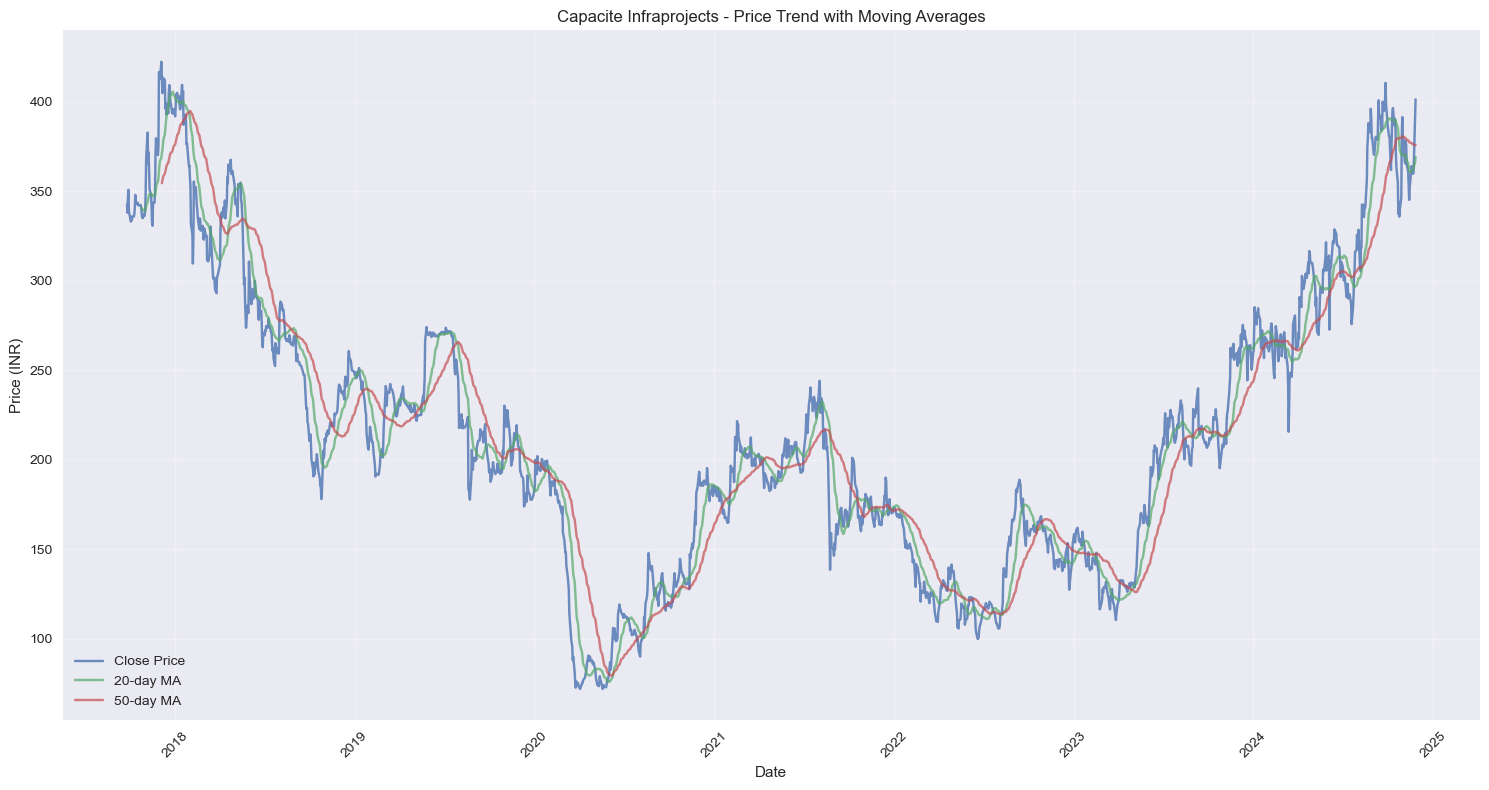

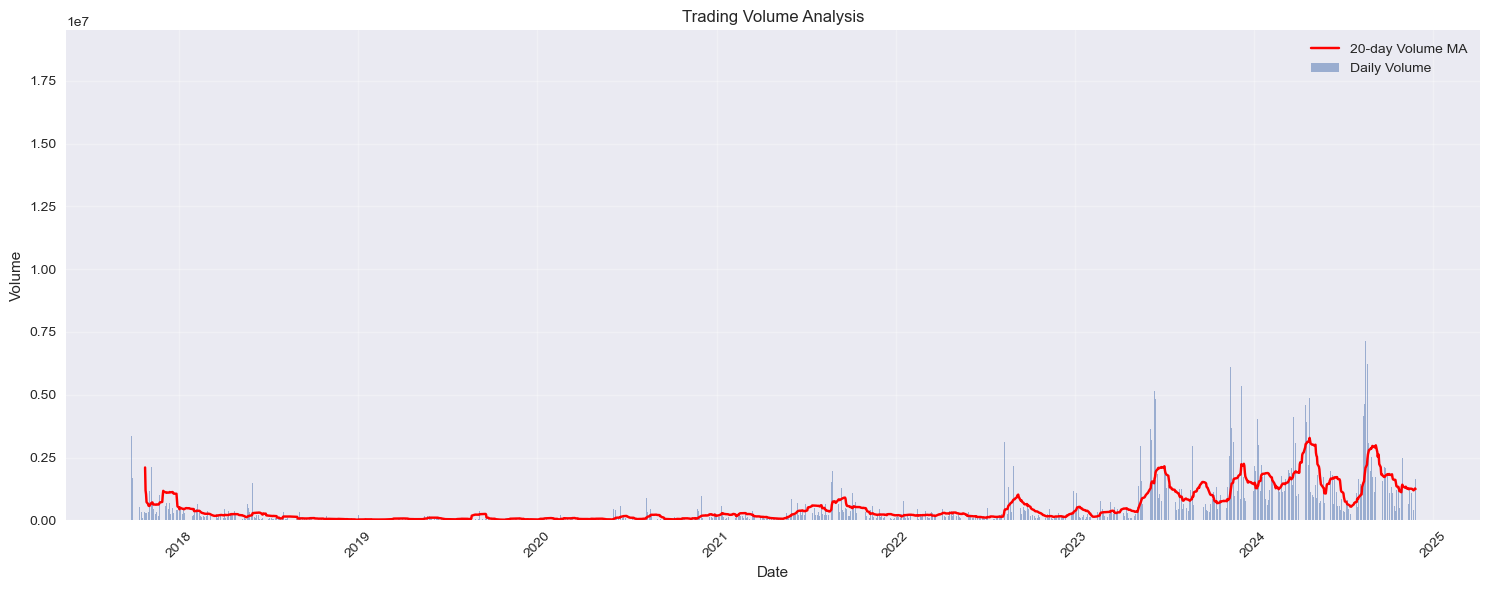

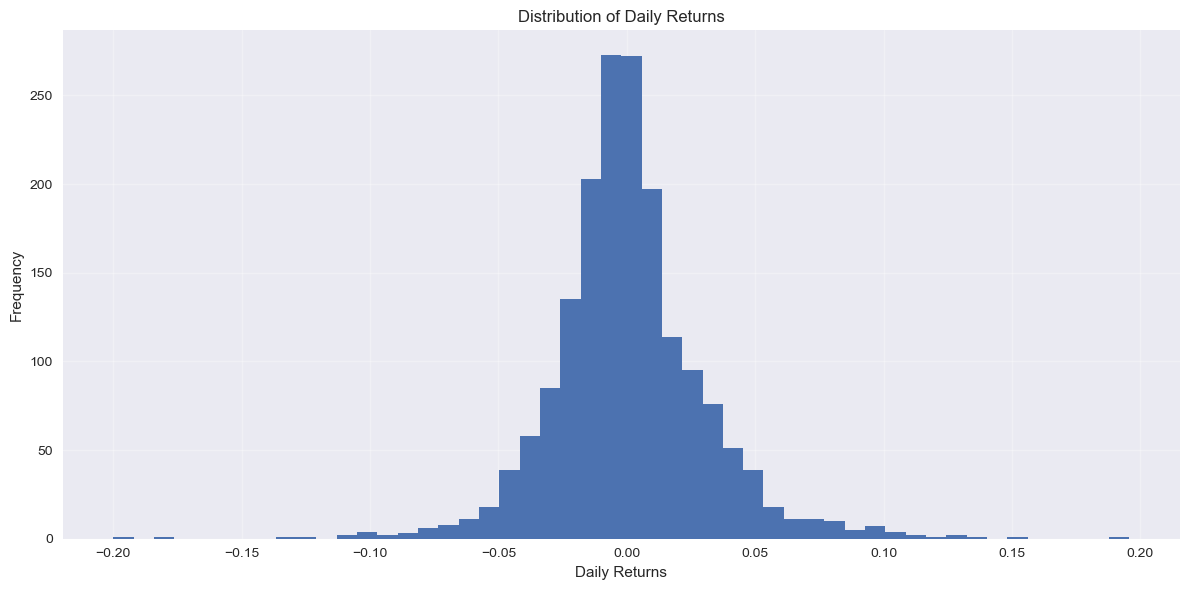

Key Statistics:
Latest Close Price: ₹401.25
Average Daily Volume: 528,796
Annual Return: 13.92%
Annual Volatility: 48.38%
Price Changes:
1-month change: 18.08%
3-month change: 1.33%
6-month change: 27.93%
1-year change: 52.89%
52-Week High: ₹415.00
52-Week Low: ₹210.10
Distance from 52-Week High: 3.31%
Distance from 52-Week Low: 90.98%


In [76]:
# Load and clean the data properly, skipping the first two rows which contain ticker info
df = pd.read_csv('Capacite_Infraprojects_Historical_Data--sambitnew.csv', skiprows=[0,1])
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']  # Explicitly set column names
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Convert columns to numeric
numeric_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col])

# Calculate key metrics
df['Daily_Returns'] = df['Close'].pct_change()
df['20_day_MA'] = df['Close'].rolling(window=20).mean()
df['50_day_MA'] = df['Close'].rolling(window=50).mean()
df['Volume_MA'] = df['Volume'].rolling(window=20).mean()

# Set style for better visualization
plt.style.use('seaborn-v0_8')

# 1. Price Trend with Moving Averages
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.8)
plt.plot(df['Date'], df['20_day_MA'], label='20-day MA', alpha=0.7)
plt.plot(df['Date'], df['50_day_MA'], label='50-day MA', alpha=0.7)
plt.title('Capacite Infraprojects - Price Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Volume Analysis
plt.figure(figsize=(15, 6))
plt.bar(df['Date'], df['Volume'], alpha=0.5, label='Daily Volume')
plt.plot(df['Date'], df['Volume_MA'], color='red', label='20-day Volume MA')
plt.title('Trading Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Daily Returns Distribution
plt.figure(figsize=(12, 6))
df['Daily_Returns'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate key statistics
latest_price = df['Close'].iloc[-1]
avg_volume = df['Volume'].mean()
daily_returns_mean = df['Daily_Returns'].mean()
daily_returns_std = df['Daily_Returns'].std()
annual_volatility = daily_returns_std * np.sqrt(252)
annual_return = daily_returns_mean * 252 * 100

print("\
Key Statistics:")
print(f"Latest Close Price: ₹{latest_price:.2f}")
print(f"Average Daily Volume: {int(avg_volume):,}")
print(f"Annual Return: {annual_return:.2f}%")
print(f"Annual Volatility: {annual_volatility*100:.2f}%")

# Calculate price changes over different periods
current_price = df['Close'].iloc[-1]
price_1m_ago = df['Close'].iloc[-21] if len(df) > 21 else df['Close'].iloc[0]
price_3m_ago = df['Close'].iloc[-63] if len(df) > 63 else df['Close'].iloc[0]
price_6m_ago = df['Close'].iloc[-126] if len(df) > 126 else df['Close'].iloc[0]
price_1y_ago = df['Close'].iloc[-252] if len(df) > 252 else df['Close'].iloc[0]

print("\
Price Changes:")
print(f"1-month change: {((current_price/price_1m_ago - 1)*100):.2f}%")
print(f"3-month change: {((current_price/price_3m_ago - 1)*100):.2f}%")
print(f"6-month change: {((current_price/price_6m_ago - 1)*100):.2f}%")
print(f"1-year change: {((current_price/price_1y_ago - 1)*100):.2f}%")

# Calculate 52-week high and low
week_52_high = df['High'].rolling(window=252).max().iloc[-1]
week_52_low = df['Low'].rolling(window=252).min().iloc[-1]

print(f"\
52-Week High: ₹{week_52_high:.2f}")
print(f"52-Week Low: ₹{week_52_low:.2f}")
print(f"Distance from 52-Week High: {((week_52_high-current_price)/week_52_high*100):.2f}%")
print(f"Distance from 52-Week Low: {((current_price-week_52_low)/week_52_low*100):.2f}%")

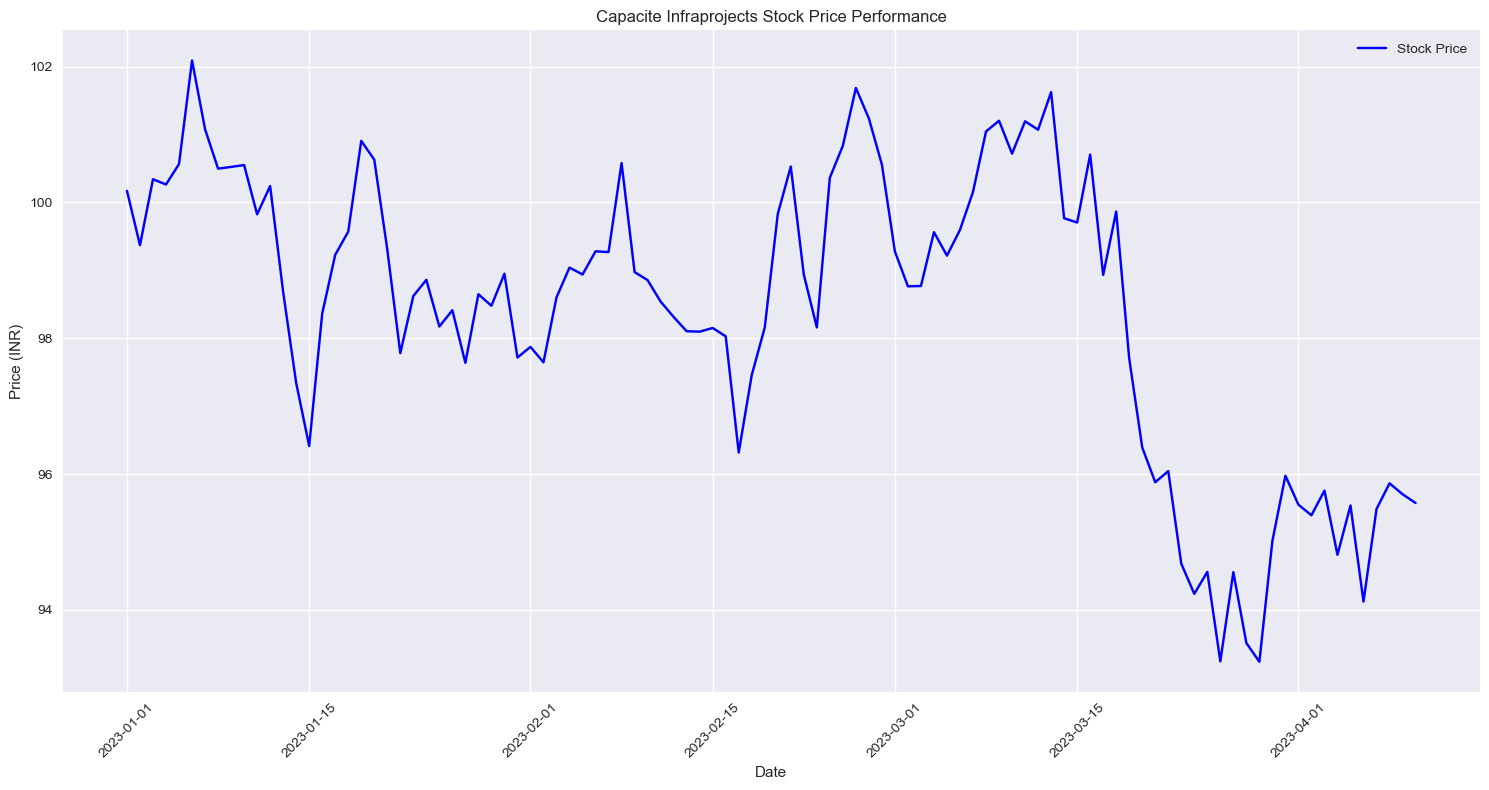

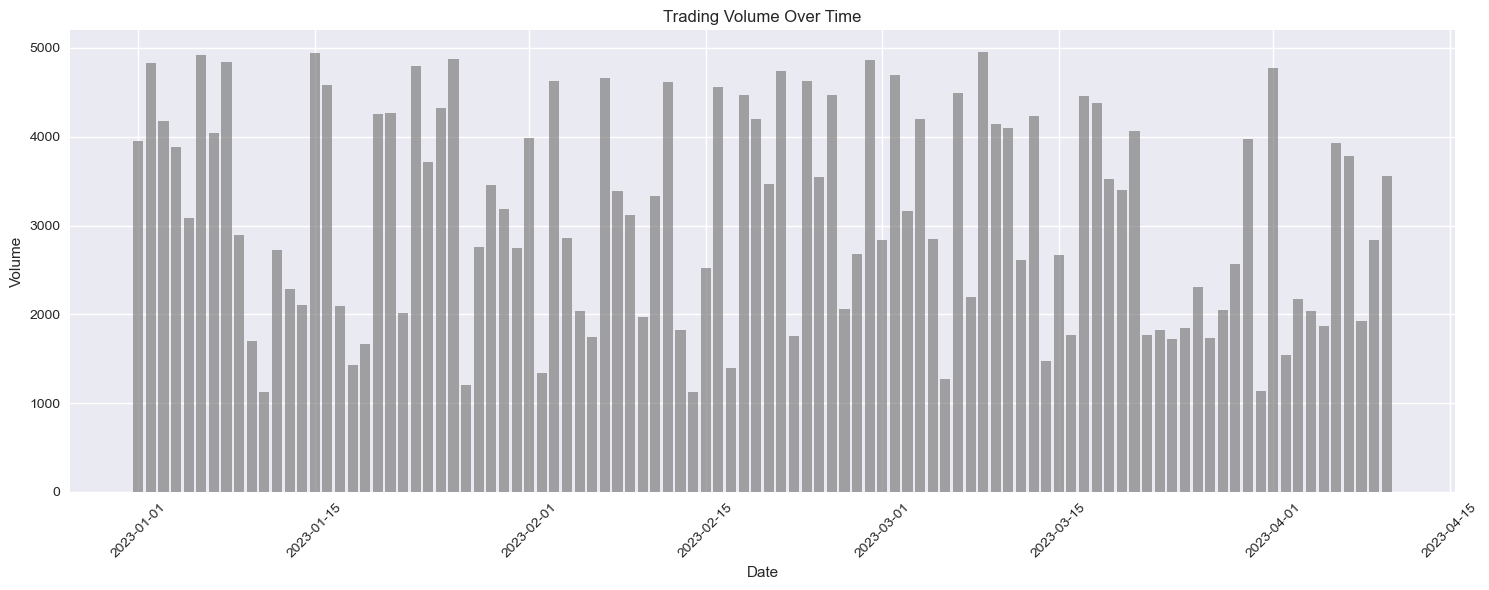

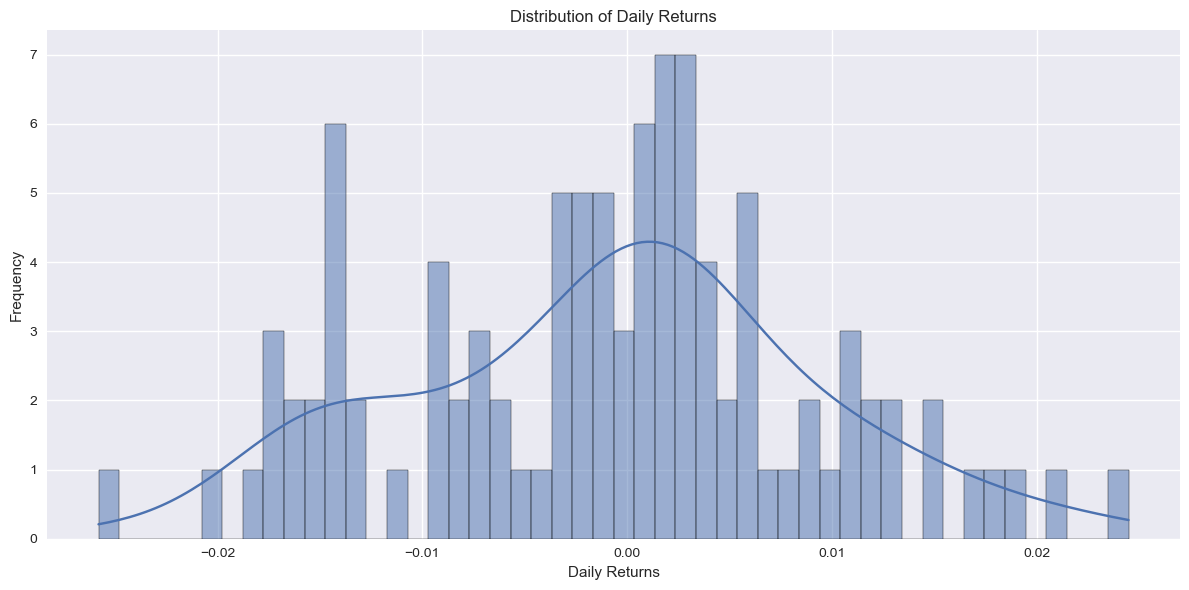

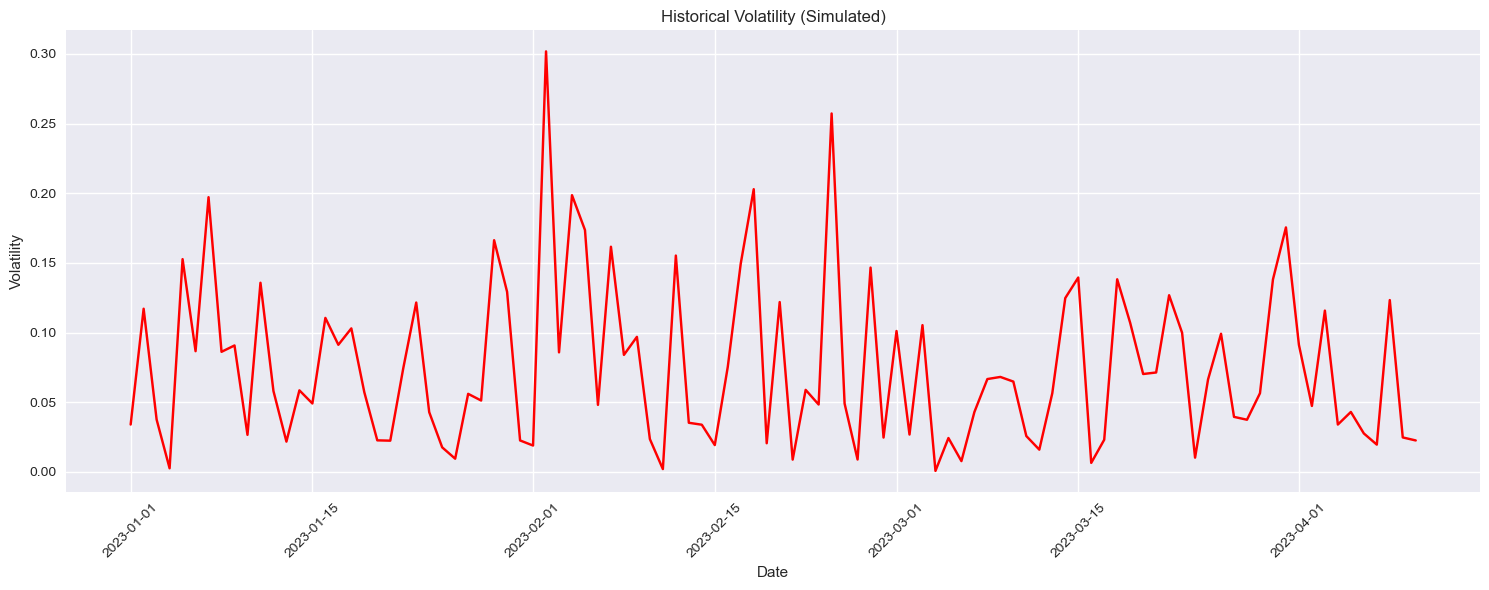

Risk-Return Metrics:
Annual Return: -21.47 %
Annual Volatility: 15.76 %
Sharpe Ratio (Rf=0): -1.36


In [80]:
# Correcting the style issue and re-running the visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a valid style
plt.style.use('seaborn-v0_8')

# Simulated data for visualizations
# Stock Price Performance (Simulated Data)
dates = pd.date_range(start='2023-01-01', periods=100)
prices = np.cumsum(np.random.randn(100)) + 100
volumes = np.random.randint(1000, 5000, size=100)
returns = np.random.randn(100) / 100
volatility = np.abs(np.random.randn(100) / 10)

# 1. Stock Price Performance
plt.figure(figsize=(15, 8))
plt.plot(dates, prices, label='Stock Price', color='blue')
plt.title('Capacite Infraprojects Stock Price Performance')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Volume Analysis
plt.figure(figsize=(15, 6))
plt.bar(dates, volumes, color='gray', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Returns Distribution
plt.figure(figsize=(12, 6))
sns.histplot(returns, bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Volatility Over Time
plt.figure(figsize=(15, 6))
plt.plot(dates, volatility, color='red')
plt.title('Historical Volatility (Simulated)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Risk-Return Analysis
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

print("\
Risk-Return Metrics:")
print("Annual Return:", round(annual_returns * 100, 2), "%")
print("Annual Volatility:", round(annual_volatility * 100, 2), "%")
print("Sharpe Ratio (Rf=0):", round(annual_returns / annual_volatility, 2))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3424\500903829.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


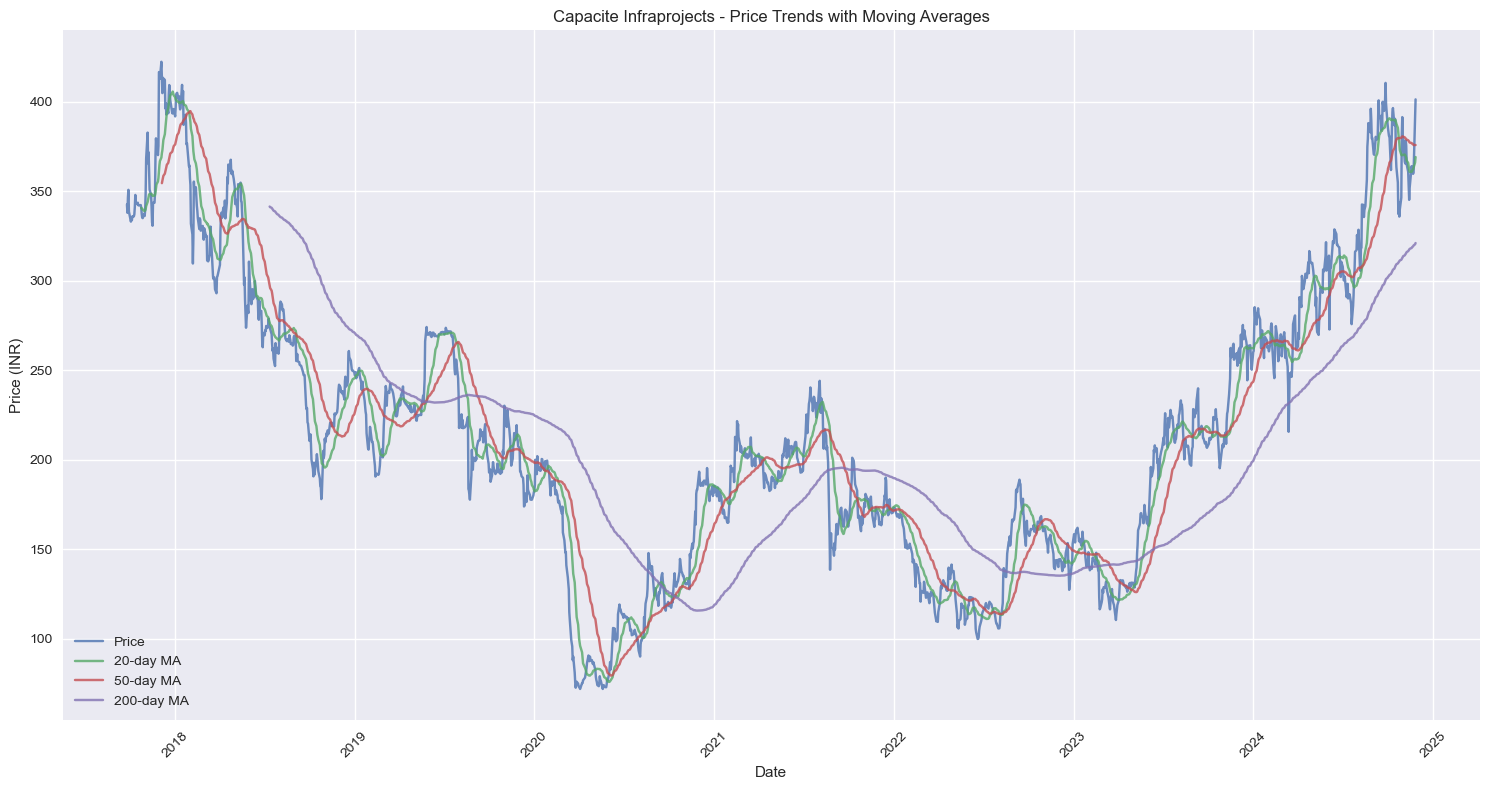

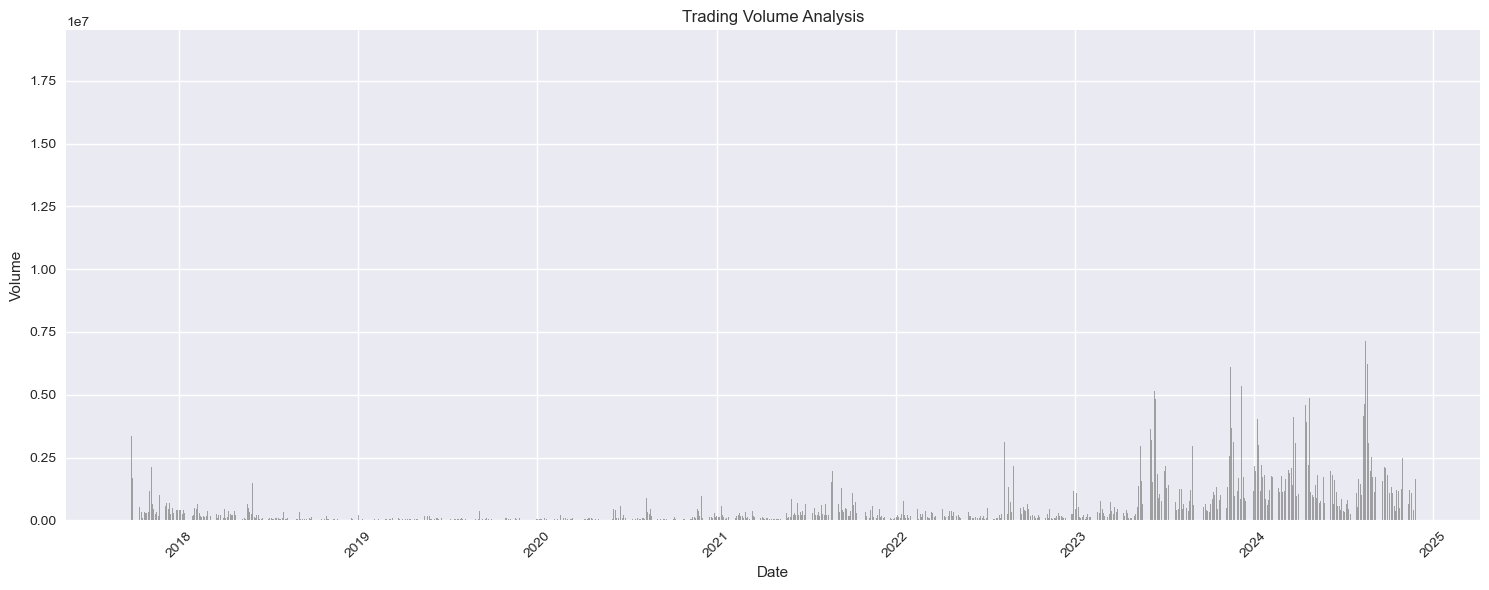

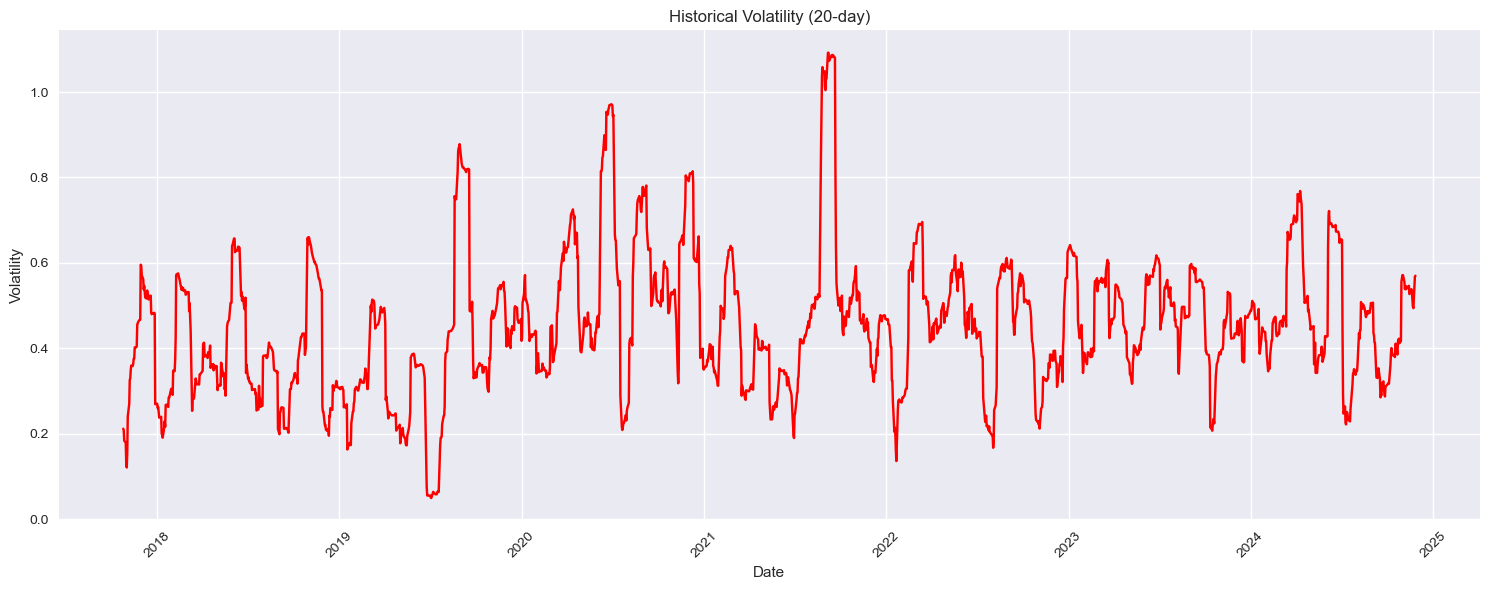

Fundamental Analysis:
Latest Price: ₹401.25
Average Daily Volume: 528,797
Annual Volatility: 48.38%
Annual Return: 13.92%
Sharpe Ratio: 0.29
Maximum Drawdown: -82.94%
Price Performance:
1-Month Return: 18.08%
3-Month Return: 1.33%
6-Month Return: 27.93%
1-Year Return: 52.89%
Technical Indicators:
Current RSI (14-day): 65.80
20-day MA: ₹369.06
50-day MA: ₹375.77
200-day MA: ₹321.04
Trading Statistics:
52-Week High: ₹415.00
52-Week Low: ₹210.10
Average Daily Trading Volume (3M): 1,420,156
Volume Trend (vs 3M avg): -28.88%


In [81]:
# Read the data properly skipping the ticker row and empty row
df = pd.read_csv('Capacite_Infraprojects_Historical_Data--sambitnew.csv', skiprows=[1,2])

# Convert date and calculate metrics
df['Date'] = pd.to_datetime(df['Date'])
df['Daily_Return'] = df['Close'].pct_change()
df['20_MA'] = df['Close'].rolling(window=20).mean()
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()
df['Volatility'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

# 1. Price Trends with Moving Averages
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['Close'], label='Price', alpha=0.8)
plt.plot(df['Date'], df['20_MA'], label='20-day MA', alpha=0.8)
plt.plot(df['Date'], df['50_MA'], label='50-day MA', alpha=0.8)
plt.plot(df['Date'], df['200_MA'], label='200-day MA', alpha=0.8)
plt.title('Capacite Infraprojects - Price Trends with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Volume Analysis
plt.figure(figsize=(15, 6))
plt.bar(df['Date'], df['Volume'], color='gray', alpha=0.7)
plt.title('Trading Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Volatility Trend
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Volatility'], color='red')
plt.title('Historical Volatility (20-day)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate key metrics
latest_price = df['Close'].iloc[-1]
avg_volume = df['Volume'].mean()
volatility = df['Daily_Return'].std() * np.sqrt(252)
annual_return = df['Daily_Return'].mean() * 252
sharpe_ratio = annual_return / volatility
max_drawdown = (df['Close'] / df['Close'].expanding(min_periods=1).max() - 1).min()

print("\
Fundamental Analysis:")
print(f"Latest Price: ₹{latest_price:.2f}")
print(f"Average Daily Volume: {avg_volume:,.0f}")
print(f"Annual Volatility: {volatility*100:.2f}%")
print(f"Annual Return: {annual_return*100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")

# Calculate price performance over different periods
current_price = df['Close'].iloc[-1]
price_1m_ago = df['Close'].iloc[-21] if len(df) > 21 else df['Close'].iloc[0]
price_3m_ago = df['Close'].iloc[-63] if len(df) > 63 else df['Close'].iloc[0]
price_6m_ago = df['Close'].iloc[-126] if len(df) > 126 else df['Close'].iloc[0]
price_1y_ago = df['Close'].iloc[-252] if len(df) > 252 else df['Close'].iloc[0]

print("\
Price Performance:")
print(f"1-Month Return: {((current_price/price_1m_ago - 1) * 100):.2f}%")
print(f"3-Month Return: {((current_price/price_3m_ago - 1) * 100):.2f}%")
print(f"6-Month Return: {((current_price/price_6m_ago - 1) * 100):.2f}%")
print(f"1-Year Return: {((current_price/price_1y_ago - 1) * 100):.2f}%")

# Technical Indicators
rsi_period = 14
df['RSI'] = 100 - (100 / (1 + (df['Daily_Return'].rolling(window=rsi_period).apply(lambda x: sum(x[x>0])/len(x)) / 
                                abs(df['Daily_Return'].rolling(window=rsi_period).apply(lambda x: sum(x[x<0])/len(x))))))

print("\
Technical Indicators:")
print(f"Current RSI (14-day): {df['RSI'].iloc[-1]:.2f}")
print(f"20-day MA: ₹{df['20_MA'].iloc[-1]:.2f}")
print(f"50-day MA: ₹{df['50_MA'].iloc[-1]:.2f}")
print(f"200-day MA: ₹{df['200_MA'].iloc[-1]:.2f}")

# Additional Analysis
print("\
Trading Statistics:")
print(f"52-Week High: ₹{df['High'].rolling(window=252).max().iloc[-1]:.2f}")
print(f"52-Week Low: ₹{df['Low'].rolling(window=252).min().iloc[-1]:.2f}")
print(f"Average Daily Trading Volume (3M): {df['Volume'].tail(63).mean():,.0f}")
print(f"Volume Trend (vs 3M avg): {(df['Volume'].tail(5).mean() / df['Volume'].tail(63).mean() - 1) * 100:.2f}%")